In [1]:
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
import data

2022-12-05 16:31:11.527717: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-05 16:31:11.627051: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-12-05 16:31:11.650901: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-05 16:31:12.066309: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

In [2]:
train_data = pd.read_csv("data/train_with_embeddings.csv")

In [3]:
train_data.columns

Index(['Unnamed: 0', 'text', 'retweets_count', 'favorites_count',
       'followers_count', 'statuses_count', 'friends_count', 'mentions',
       'urls', 'verified', 'hashtags', 'timestamp', 'TweetID', '0', '1', '2',
       '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15',
       '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27',
       '28', '29', '30', '31'],
      dtype='object')

In [4]:
train_data = train_data.drop(["Unnamed: 0"], axis=1)

In [5]:
display(train_data)

,text,retweets_count,favorites_count,followers_count,statuses_count,friends_count,mentions,urls,verified,hashtags,...,22,23,24,25,26,27,28,29,30,31
0,rt refarcir macron ans nom prépare,3,0,3682,453535,3628,[],[],0,[],...,10.054362,-4.799339,5.293067,5.319586,-6.084175,-0.995282,0.036673,-3.858557,-0.609939,-4.981123
1,populaire,0,0,86,1016,284,[],[],0,[],...,1.787920,0.199613,-1.410538,2.594519,-3.822510,-1.030016,-0.827803,-1.076237,0.722675,6.484530
2,faut dégager cinglé,3,1,1944,28234,1995,[],[],0,[],...,2.285871,-0.411960,-0.332312,2.621252,-6.393065,0.900177,-2.831811,-4.202757,-3.455490,-5.088757
3,enseignants mettre prescriptions président rép...,0,0,1,1072,0,[],['https://t.co/rytlted08g'],0,[],...,29.191178,-1.944329,-15.338485,9.890559,-5.804142,-2.048839,-13.769104,1.030074,-12.116789,-16.369833
4,mafieuse oppressive macron,0,0,13957,25311,10841,[],[],0,[],...,2.311890,-1.660314,4.187139,-0.374733,-2.256222,2.226641,-0.727584,-3.053435,-0.500713,-2.897207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353964,gonflette tour raciste frustré,0,0,34,1509,55,[],['https://t.co/pma33zhslx'],0,[],...,4.569858,-0.669614,2.566380,2.402225,-6.871164,6.563013,1.465242,-6.617853,-2.144988,2.218035
353965,france caste crapuleuse encadrée gangsters irr...,0,0,89,11166,127,[],[],0,[],...,3.919258,-6.405608,4.369711,4.078979,-1.727045,-8.551694,-0.579737,-6.926860,-1.625983,-1.152562
353966,eric zemmour français berbère,3,0,1888,712,3086,[],[],0,[],...,9.080252,3.816033,11.755902,-3.395788,-2.700490,-4.050223,7.652112,-10.707191,3.672036,-8.748533
353967,gauchistes dépression pq,0,0,139,486,320,[],[],0,[],...,0.269775,-6.280955,-0.384338,1.331104,-1.847552,3.463016,2.985334,-0.170401,-3.622019,1.070492


In [6]:
# new features
train_data["url_count"] = train_data["urls"].apply(lambda s: s[1:-1].count("\'")/2)
train_data["text_len"] = train_data["text"].apply(lambda s: len(s))
train_data["hashtags_count"] = train_data["hashtags"].apply(lambda s: s[1:-1].count("\'")/2)
train_data["day"] = train_data["timestamp"].apply(lambda t: datetime.utcfromtimestamp(t/1000).day)
train_data["hour"] = train_data["timestamp"].apply(lambda t: datetime.utcfromtimestamp(t/1000).hour)

# text features
train_data["avg_word_len"] = train_data["text"].apply(lambda s: np.mean([len(w) for w in s.split()]))
train_data["rep_words_freq"] = train_data["text"].apply(lambda s: np.mean(len(list(set(s.split())))/len(s.split())))
train_data["rep_chars_freq"] = train_data["text"].apply(lambda s: np.mean(len(list(set(s)))/len(list(s))))
train_data["max_char_freq"] = train_data["text"].apply(lambda s: max( [s.count(c) for c in list(set(s))] )   /len(list(s)))
train_data["avg_word_count"] = train_data["text"].apply(lambda s: len(s.split()))

# indicators of keywords
# train_data["Macron"] =  train_data["text"].apply(lambda s: ("macron" in s.lower().split()))
# train_data["Zemmour"] =  train_data["text"].apply(lambda s: ("zemmour" in s.lower().split()))
# train_data["Melenchon"] =  train_data["text"].apply(lambda s: ("melenchon" in s.replace("é","e").lower().split()))
train_data["rt"] =  train_data["text"].apply(lambda s: ("rt" in s.lower().split()))

In [7]:
display(train_data)

,text,retweets_count,favorites_count,followers_count,statuses_count,friends_count,mentions,urls,verified,hashtags,...,text_len,hashtags_count,day,hour,avg_word_len,rep_words_freq,rep_chars_freq,max_char_freq,avg_word_count,rt
0,rt refarcir macron ans nom prépare,3,0,3682,453535,3628,[],[],0,[],...,34,0.0,11,5,4.833333,1.000000,0.411765,0.205882,6,True
1,populaire,0,0,86,1016,284,[],[],0,[],...,9,0.0,19,12,9.000000,1.000000,0.888889,0.222222,1,False
2,faut dégager cinglé,3,1,1944,28234,1995,[],[],0,[],...,19,0.0,15,18,5.666667,1.000000,0.736842,0.157895,3,False
3,enseignants mettre prescriptions président rép...,0,0,1,1072,0,[],['https://t.co/rytlted08g'],0,[],...,123,0.0,14,11,7.857143,0.928571,0.170732,0.138211,14,False
4,mafieuse oppressive macron,0,0,13957,25311,10841,[],[],0,[],...,26,0.0,14,11,8.000000,1.000000,0.538462,0.153846,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353964,gonflette tour raciste frustré,0,0,34,1509,55,[],['https://t.co/pma33zhslx'],0,[],...,30,0.0,16,13,6.750000,1.000000,0.500000,0.166667,4,False
353965,france caste crapuleuse encadrée gangsters irr...,0,0,89,11166,127,[],[],0,[],...,69,0.0,12,8,9.000000,1.000000,0.260870,0.159420,7,False
353966,eric zemmour français berbère,3,0,1888,712,3086,[],[],0,[],...,29,0.0,18,12,6.500000,1.000000,0.551724,0.172414,4,False
353967,gauchistes dépression pq,0,0,139,486,320,[],[],0,[],...,24,0.0,11,8,7.333333,1.000000,0.708333,0.166667,3,False


In [8]:
display(train_data)

,text,retweets_count,favorites_count,followers_count,statuses_count,friends_count,mentions,urls,verified,hashtags,...,text_len,hashtags_count,day,hour,avg_word_len,rep_words_freq,rep_chars_freq,max_char_freq,avg_word_count,rt
0,rt refarcir macron ans nom prépare,3,0,3682,453535,3628,[],[],0,[],...,34,0.0,11,5,4.833333,1.000000,0.411765,0.205882,6,True
1,populaire,0,0,86,1016,284,[],[],0,[],...,9,0.0,19,12,9.000000,1.000000,0.888889,0.222222,1,False
2,faut dégager cinglé,3,1,1944,28234,1995,[],[],0,[],...,19,0.0,15,18,5.666667,1.000000,0.736842,0.157895,3,False
3,enseignants mettre prescriptions président rép...,0,0,1,1072,0,[],['https://t.co/rytlted08g'],0,[],...,123,0.0,14,11,7.857143,0.928571,0.170732,0.138211,14,False
4,mafieuse oppressive macron,0,0,13957,25311,10841,[],[],0,[],...,26,0.0,14,11,8.000000,1.000000,0.538462,0.153846,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353964,gonflette tour raciste frustré,0,0,34,1509,55,[],['https://t.co/pma33zhslx'],0,[],...,30,0.0,16,13,6.750000,1.000000,0.500000,0.166667,4,False
353965,france caste crapuleuse encadrée gangsters irr...,0,0,89,11166,127,[],[],0,[],...,69,0.0,12,8,9.000000,1.000000,0.260870,0.159420,7,False
353966,eric zemmour français berbère,3,0,1888,712,3086,[],[],0,[],...,29,0.0,18,12,6.500000,1.000000,0.551724,0.172414,4,False
353967,gauchistes dépression pq,0,0,139,486,320,[],[],0,[],...,24,0.0,11,8,7.333333,1.000000,0.708333,0.166667,3,False


In [9]:
train_data = data.feature_words_arr(train_data)
train_data = data.feature_delete_stop_words(train_data, 'text_without_stopwords')
train_data = data.feature_sent_analysis(train_data, 'text_without_stopwords')
# # outlier removal
# train_data = train_data[train_data["retweets_count"] <= 40000]

In [10]:
# from nltk.sentiment import SentimentIntensityAnalyzer
# sia = SentimentIntensityAnalyzer()
# print("sentiment analysis...")
# train_data["compound"] =  train_data["text"].apply(lambda s: sia.polarity_scores(s)['compound'])

In [11]:
display(train_data)

,text,retweets_count,favorites_count,followers_count,statuses_count,friends_count,mentions,urls,verified,hashtags,...,avg_word_len,rep_words_freq,rep_chars_freq,max_char_freq,avg_word_count,rt,text_arr,text_without_stopwords,polarity,subjectivity
0,rt refarcir macron ans nom prépare,3,0,3682,453535,3628,[],[],0,[],...,4.833333,1.000000,0.411765,0.205882,6,True,"[rt, refarcir, macron, ans, nom, prépare]",rt refarcir macron ans nom prépare,0.00,0.000
1,populaire,0,0,86,1016,284,[],[],0,[],...,9.000000,1.000000,0.888889,0.222222,1,False,[populaire],populaire,0.50,0.500
2,faut dégager cinglé,3,1,1944,28234,1995,[],[],0,[],...,5.666667,1.000000,0.736842,0.157895,3,False,"[faut, dégager, cinglé]",faut dégager cinglé,-0.01,-0.010
3,enseignants mettre prescriptions président rép...,0,0,1,1072,0,[],['https://t.co/rytlted08g'],0,[],...,7.857143,0.928571,0.170732,0.138211,14,False,"[enseignants, mettre, prescriptions, président...",enseignants mettre prescriptions président rép...,0.06,0.125
4,mafieuse oppressive macron,0,0,13957,25311,10841,[],[],0,[],...,8.000000,1.000000,0.538462,0.153846,3,False,"[mafieuse, oppressive, macron]",mafieuse oppressive macron,0.00,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353964,gonflette tour raciste frustré,0,0,34,1509,55,[],['https://t.co/pma33zhslx'],0,[],...,6.750000,1.000000,0.500000,0.166667,4,False,"[gonflette, tour, raciste, frustré]",gonflette tour raciste frustré,0.00,0.000
353965,france caste crapuleuse encadrée gangsters irr...,0,0,89,11166,127,[],[],0,[],...,9.000000,1.000000,0.260870,0.159420,7,False,"[france, caste, crapuleuse, encadrée, gangster...",france caste crapuleuse encadrée gangsters irr...,0.10,0.200
353966,eric zemmour français berbère,3,0,1888,712,3086,[],[],0,[],...,6.500000,1.000000,0.551724,0.172414,4,False,"[eric, zemmour, français, berbère]",eric zemmour français berbère,0.20,0.000
353967,gauchistes dépression pq,0,0,139,486,320,[],[],0,[],...,7.333333,1.000000,0.708333,0.166667,3,False,"[gauchistes, dépression, pq]",gauchistes dépression pq,0.00,0.000


In [12]:
# select useful columns
train_data_filtered = train_data.drop(["text", "urls", "mentions", "hashtags", "timestamp", "TweetID",
                                        "text_arr", "text_without_stopwords"], axis=1)

In [13]:
# train_data_filtered = train_data.loc[:, ["retweets_count","favorites_count","followers_count","statuses_count","friends_count",
#                                  "hashtags_count","hour","verified","url_count","text_len","rt","Macron","Zemmour","Melenchon"]]


X_train, X_eval, y_train, y_eval = train_test_split(train_data_filtered.drop("retweets_count", axis=1),
                                                    train_data_filtered["retweets_count"],
                                                    random_state=42, test_size=0.1)

# Standardize the data
# normal_columns = train_data_filtered.drop(["hour", "verified", "Macron", "Zemmour", "Melenchon", "url_count", "rt", "retweets_count"], axis=1).columns
normal_columns = train_data_filtered.drop(["hour", "verified", "url_count", "rt", "retweets_count"], axis=1).columns
mu, sigma = X_train[normal_columns].mean(axis=0), X_train[normal_columns].std(axis=0)
X_train.loc[:, normal_columns] = (X_train[normal_columns] - mu) / sigma
X_eval.loc[:, normal_columns] = (X_eval[normal_columns] - mu) / sigma

In [14]:
import tensorflow as tf

In [15]:
# model = tf.keras.models.Sequential([
#   tf.keras.layers.Dense(32, activation='relu'),
#   tf.keras.layers.Dense(32, activation='relu'),
#   tf.keras.layers.Dense(32, activation='relu'),
#   tf.keras.layers.Dense(1),
# ])

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(20, activation='relu'),
  # tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(1),
])

# model = tf.keras.models.Sequential([
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(128, activation='relu'),
#   tf.keras.layers.Dropout(0.2),
#   tf.keras.layers.Dense(1),
# ])

2022-12-05 16:32:07.466668: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
# model.compile(optimizer="adam", loss='mae')

In [17]:
import tensorflow_addons as tfa
optimizer = tfa.optimizers.AdamW(learning_rate=1e-3, weight_decay=1e-5)
model.compile(optimizer=optimizer, loss='mae')

In [55]:
history = model.fit(X_train.values.astype(np.float32), y_train.values.astype(np.float32), epochs=50, batch_size=1024,
         validation_data=(X_eval.values.astype(np.float32), y_eval.values.astype(np.float32)), shuffle=True)

Epoch 1/50
312/312 [==============================] - 1s 2ms/step - loss: 5.8433 - val_loss: 5.7629
Epoch 2/50
312/312 [==============================] - 1s 2ms/step - loss: 5.8323 - val_loss: 5.6839
Epoch 3/50
312/312 [==============================] - 1s 3ms/step - loss: 5.8277 - val_loss: 5.7142
Epoch 4/50
312/312 [==============================] - 1s 3ms/step - loss: 5.8307 - val_loss: 5.7179
Epoch 5/50
312/312 [==============================] - 1s 3ms/step - loss: 5.8193 - val_loss: 5.6858
Epoch 6/50
312/312 [==============================] - 1s 2ms/step - loss: 5.8263 - val_loss: 5.7378
Epoch 7/50
312/312 [==============================] - 1s 3ms/step - loss: 5.8291 - val_loss: 5.7064
Epoch 8/50
312/312 [==============================] - 1s 2ms/step - loss: 5.8216 - val_loss: 5.7830
Epoch 9/50
312/312 [==============================] - 1s 3ms/step - loss: 5.8194 - val_loss: 5.7211
Epoch 10/50
312/312 [==============================] - 1s 2ms/step - loss: 5.8208 - val_loss: 5.7595

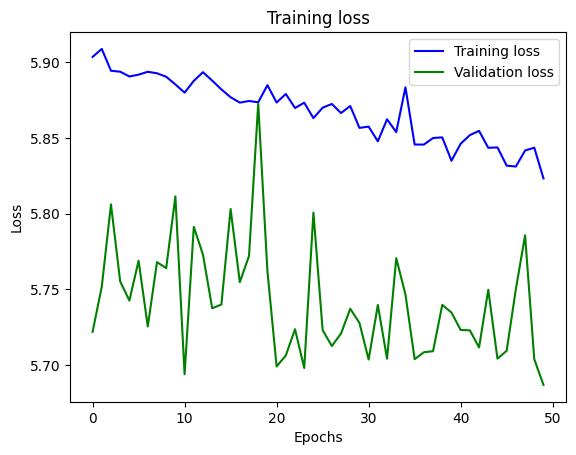

In [27]:
plt.plot(history.epoch, history.history["loss"], 'b', label='Training loss')
plt.plot(history.epoch, history.history["val_loss"], 'g', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [28]:
model.evaluate(X_eval.values.astype(np.float32),  y_eval.values.astype(np.float32), verbose=2)

1107/1107 - 1s - loss: 5.6867 - 627ms/epoch - 567us/step


5.686692237854004

In [29]:
pred = model.predict(X_train.values.astype(np.float32))
print(pred)

9956/9956 [==============================] - 6s 552us/step
[[-0.01350658]
 [ 1.0917414 ]
 [ 0.34341413]
 ...
 [ 1.1665752 ]
 [-0.00321   ]
 [ 1.2614658 ]]


In [22]:
# plt.scatter(X_train["favorites_count"], model.predict(X_train))
# plt.scatter(X_train["favorites_count"], y_train.values.astype(np.float32))

In [50]:
# evaluation

eval_data = pd.read_csv("data/evaluation_with_embeddings.csv")
eval_data = eval_data.drop(["Unnamed: 0"], axis=1)
tweets = eval_data["TweetID"]

In [51]:
eval_data["url_count"] = eval_data["urls"].apply(lambda s: s[1:-1].count("\'")/2)
eval_data["text_len"] = eval_data["text"].apply(lambda s: len(s))
eval_data["hashtags_count"] = eval_data["hashtags"].apply(lambda s: s[1:-1].count("\'")/2)
eval_data["day"] = eval_data["timestamp"].apply(lambda t: datetime.utcfromtimestamp(t/1000).day)
eval_data["hour"] = eval_data["timestamp"].apply(lambda t: datetime.utcfromtimestamp(t/1000).hour)
# eval_data["Macron"] =  eval_data["text"].apply(lambda s: ("macron" in s.lower().split()))
# eval_data["Zemmour"] =  eval_data["text"].apply(lambda s: ("zemmour" in s.lower().split()))
# eval_data["Melenchon"] =  eval_data["text"].apply(lambda s: ("melenchon" in s.lower().split()))
eval_data["avg_word_len"] = eval_data["text"].apply(lambda s: np.mean([len(w) for w in s.split()]))
eval_data["rep_words_freq"] = eval_data["text"].apply(lambda s: np.mean(len(list(set(s.split())))/len(s.split())))
eval_data["rep_chars_freq"] = eval_data["text"].apply(lambda s: np.mean(len(list(set(s)))/len(list(s))))
eval_data["max_char_freq"] = eval_data["text"].apply(lambda s: max( [s.count(c) for c in list(set(s))] )/len(list(s)))
eval_data["avg_word_count"] = eval_data["text"].apply(lambda s: len(s.split()))

eval_data["rt"] =  eval_data["text"].apply(lambda s: ("rt" in s.lower().split()))

# print("sentiment analysis...")
# eval_data["compound"] =  eval_data["text"].apply(lambda s: sia.polarity_scores(s)['compound'])

eval_data = data.feature_words_arr(eval_data)
eval_data = data.feature_delete_stop_words(eval_data, 'text_without_stopwords')
eval_data = data.feature_sent_analysis(eval_data, 'text_without_stopwords')

eval_data = eval_data.drop(["text", "urls", "mentions", "hashtags", "timestamp", "TweetID",
                                        "text_arr", "text_without_stopwords"], axis=1)

# normalize
eval_data.loc[:, normal_columns] = (eval_data.loc[:, normal_columns] - mu) / sigma

display(eval_data)

,favorites_count,followers_count,statuses_count,friends_count,verified,0,1,2,3,4,...,day,hour,avg_word_len,rep_words_freq,rep_chars_freq,max_char_freq,avg_word_count,rt,polarity,subjectivity
0,-0.055089,-0.077561,-0.384487,-0.451430,0,0.627411,-0.188243,-1.069439,-0.627192,-0.398087,...,1.083457,12,1.299186,0.396204,1.110779,2.917037,-1.214200,False,-0.072405,-0.754931
1,-0.055089,-0.076250,-0.130940,-0.405207,0,-0.000590,0.682637,-0.716718,-0.610757,1.009279,...,1.083457,11,0.603576,0.396204,1.251218,-0.457844,-1.019999,False,-0.072405,-0.754931
2,-0.047990,-0.073569,-0.308274,0.054226,0,-0.004098,0.635851,-0.348722,-0.520216,0.882950,...,-1.332955,8,-0.401193,0.396204,0.329674,0.111941,-0.631597,False,-0.072405,1.393507
3,-0.052722,-0.071378,-0.197070,0.229552,0,1.204404,-3.270518,1.816433,2.189510,-0.580318,...,-0.426800,8,-0.150000,0.396204,-1.044832,-0.390242,1.310413,False,-0.939123,0.319288
4,-0.055089,-0.076932,-0.241396,-0.434694,0,-1.208759,-0.901484,1.551472,0.123558,1.186333,...,1.385508,21,0.208034,-0.629798,-1.017076,-0.578708,1.504614,False,-0.289085,0.405225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117985,-0.055089,-0.077871,-0.421834,-0.556227,0,0.249026,0.352226,-0.638636,-0.657624,-0.304555,...,-0.728852,16,-0.323903,0.396204,0.886078,0.111941,-1.019999,False,-0.072405,-0.754931
117986,-0.055089,-0.075036,-0.076371,-0.225498,0,-0.190405,-0.782128,-1.860208,0.260190,-0.092876,...,0.781405,4,0.474760,-0.572798,-1.027759,-0.705406,1.698815,False,-0.072405,-0.754931
117987,-0.040891,-0.074347,-0.403582,-0.518372,0,0.521246,0.220602,-1.257055,0.863901,-1.019101,...,0.781405,13,-0.648521,0.396204,-0.574482,-0.223227,0.145207,False,-1.480821,1.393507
117988,-0.055089,-0.077867,-0.423504,-0.549851,0,-0.926892,-1.348052,0.007385,2.060643,-0.080239,...,1.083457,12,0.426264,0.396204,-1.004058,0.480625,1.504614,False,2.094389,3.112258


In [49]:
display(X_train)

,favorites_count,followers_count,statuses_count,friends_count,verified,0,1,2,3,4,...,day,hour,avg_word_len,rep_words_freq,rep_chars_freq,max_char_freq,avg_word_count,rt,polarity,subjectivity
286184,-0.055089,-0.077844,-0.421579,-0.525943,0,-0.454199,-0.479638,-0.839479,-0.937126,1.109783,...,0.177303,19,-1.019512,0.396204,0.026925,-0.066815,-0.243195,False,-0.072405,-0.754931
83577,-0.055089,-0.067811,-0.070867,0.325185,0,-0.049611,-1.883312,0.014960,0.632474,-0.894389,...,0.177303,8,0.448997,0.396204,-1.000478,-0.125469,0.533609,False,0.924320,-0.038785
165861,-0.055089,-0.077714,-0.417499,-0.523552,0,-0.515792,-0.471596,-0.023280,-0.515503,0.730691,...,-0.728852,17,0.062547,0.396204,0.301854,1.226187,-0.631597,False,-0.072405,-0.754931
314938,-0.045624,-0.071025,-0.322850,-0.292042,0,1.506209,-0.835940,-0.163854,-0.338194,1.489977,...,0.479354,13,-0.698462,0.396204,-0.640871,-0.095254,0.727810,False,-1.394150,1.715773
301981,-0.052722,-0.076427,-0.310814,-0.221115,0,0.193906,-0.743971,1.567646,0.206960,0.283644,...,-1.030903,5,1.762926,0.396204,-1.222545,-1.276674,1.310413,False,0.490961,0.383741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,-0.055089,-0.074569,-0.374245,-0.252993,0,1.221808,0.319591,0.832282,-0.891572,1.490662,...,1.385508,9,1.166689,0.396204,-0.119553,0.261393,-0.437396,False,-0.072405,-0.754931
259178,-0.055089,-0.067190,-0.409402,-0.420349,0,-0.331935,0.591412,-0.061578,0.488688,-0.477316,...,0.177303,16,-0.671708,0.396204,-0.195818,-0.310122,-0.243195,False,-1.372482,1.393507
131932,-0.055089,-0.062559,-0.417992,0.397706,0,-0.084263,-1.102450,-0.089161,1.266020,-0.328144,...,0.781405,17,-0.014743,0.396204,-0.671853,-0.546477,0.533609,False,-0.072405,-0.754931
146867,-0.055089,-0.076515,-0.175583,-0.372135,0,0.574601,-3.972517,-1.152867,0.601042,0.571519,...,-0.426800,9,-0.776601,-2.095515,-0.999184,0.079613,2.281418,False,2.744427,1.823195


In [52]:
pred = model.predict(eval_data.values.astype(np.float32))

print(pred)

# output normalization
for i,p in enumerate(pred):
    if p<0: pred[i] = 0

3688/3688 [==============================] - 2s 487us/step
[[0.14526947]
 [0.00750203]
 [3.156586  ]
 ...
 [3.2807662 ]
 [0.00413318]
 [0.01694293]]


In [53]:
print(pred)

[[0.14526947]
 [0.00750203]
 [3.156586  ]
 ...
 [3.2807662 ]
 [0.00413318]
 [0.01694293]]


In [54]:
with open("data/predictions.csv", 'w') as f:
    writer = csv.writer(f)
    writer.writerow(["TweetID", "retweets_count"])
    for index, prediction in enumerate(pred):
        writer.writerow([str(tweets[index]) , str(int(prediction))])